In [1]:
from apsg import *

# Stress tensor properties

## Transformation rule of the stress tensor

From an $x_i$ - system to an $x_i'$ - system, the components $\sigma_{ij}$ in the initial system are transformed into the components $\sigma_{ij}'$ in the new system according to the **tensor transformation rule**:

$$\boldsymbol{{\sigma}'} = \boldsymbol{R} \boldsymbol{\sigma} \boldsymbol{R}^{T}$$

Note that inverse rule is: $\boldsymbol{{\sigma}} = \boldsymbol{R}^{T} \boldsymbol{{\sigma}'} \boldsymbol{R}$

```{image} figures/Stress_transformation_3D.png
:alt: Stress transformation in 3D
:class: bg-primary mb-1
:width: 75%
:align: center
```

where $\boldsymbol{R}$ is a rotation matrix with components $a_{ij}$. In matrix form this is:

$$\left[{{\begin{matrix}\sigma '_{{11}}&\sigma '_{{21}}&\sigma '_{{31}}\\\sigma '_{{12}}&\sigma '_{{22}}&\sigma '_{{32}}\\\sigma '_{{13}}&\sigma '_{{23}}&\sigma '_{{33}}\\\end{matrix}}}\right]=\left[{{\begin{matrix}a_{{11}}&a_{{12}}&a_{{13}}\\a_{{21}}&a_{{22}}&a_{{23}}\\a_{{31}}&a_{{32}}&a_{{33}}\\\end{matrix}}}\right]\left[{{\begin{matrix}\sigma _{{11}}&\sigma _{{21}}&\sigma _{{31}}\\\sigma _{{12}}&\sigma _{{22}}&\sigma _{{32}}\\\sigma _{{13}}&\sigma _{{23}}&\sigma _{{33}}\\\end{matrix}}}\right]\left[{{\begin{matrix}a_{{11}}&a_{{21}}&a_{{31}}\\a_{{12}}&a_{{22}}&a_{{32}}\\a_{{13}}&a_{{23}}&a_{{33}}\\\end{matrix}}}\right]$$

In following example we will define stress tensor in orientation given by foliation and lineation plane:

In [2]:
S = stress.from_comp(xx=-8, yy=-6, zz=-2)
p = pair(90, 60, 90, 60)
R = defgrad.from_pair(p)  # rotation to local coordinates
lin(0, 0).transform(R)

L:90/60

In [3]:
fol(0, 0).transform(R)

S:90/60

In [4]:
Sr = S.transform(R)
abs(Sr.cauchy(lin(90, 60)))  # magnitude of stress on plane perpendicular to 90/60

8.0

In [5]:
Sr = S.transform(R)
abs(Sr.cauchy(fol(90, 60)))  # magnitude of stress on plane 90/60

1.9999999999999998

## Principal stresses and principal directions

At every point in a stressed body there are at least three planes, called **principal planes**, with normal vectors $\boldsymbol{n}$, called **principal directions**, where the corresponding stress vector is perpendicular to the plane, i.e., parallel or in the same
direction as the normal vector $\boldsymbol{n}$, and where there are no normal shear stresses $\tau_{\mathrm{n}}$. The three stresses normal to these principal planes are called **principal stresses**.

Note three orientations with zero shear stress in following example. Their positions are **principal directions**:

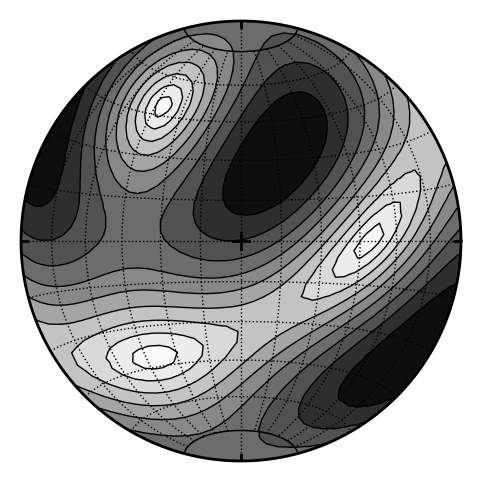

In [6]:
p = pair(150, 60, 90, 41)
S2 = S.transform(defgrad.from_pair(p))
s = StereoNet()
s.grid.apply_func(S2.shear_stress)
s.contour(levels=10)
s.show()

In [7]:
S2.eigenlins  # principal directions

(L:90/41, L:217/34, L:330/30)

In [8]:
S2.eigenfols  # principal planes

(S:270/49, S:37/56, S:150/60)

The components $\sigma_{ij}$ of the stress tensor depend on the orientation of the coordinate system at the point under consideration. However, the stress tensor itself is a physical quantity and as such, it is independent of the coordinate system chosen to represent it. There are certain **invariants** associated with every tensor which are also independent of the coordinate system. One set of such invariants are the **principal stresses** of the stress tensor, which are just the **eigenvalues** of the stress tensor. Their direction vectors are the **principal directions** or **eigenvectors**.

In [9]:
S.sigma1, S.sigma2, S.sigma3  # principal stresses of S

AttributeError: 'Stress3' object has no attribute 'sigma1'

In [ ]:
S2.sigma1, S2.sigma2, S2.sigma3  # principal stresses of S2

## Stress invariants

A stress vector parallel to the normal unit vector $\boldsymbol{n}$ is given by:

$$\boldsymbol{T}^{(\boldsymbol {n} )} = \boldsymbol{\sigma} \cdot \boldsymbol{n} = \lambda \boldsymbol{n}$$

where $\lambda$ is a constant of proportionality, and in this particular case corresponds to the magnitudes $\sigma_n$ of the normal stress vectors or principal stresses.

$$\begin{aligned}
  \boldsymbol{\sigma} \cdot \boldsymbol{n} &= \lambda \boldsymbol{n} \\
  \boldsymbol{\sigma} \cdot \boldsymbol{n} - \lambda \boldsymbol{n} &= \boldsymbol{0} \\
  \left(\boldsymbol{\sigma} - \lambda \delta _{ij}\right)\boldsymbol{n} &= \boldsymbol{0}\\
\end{aligned}$$

This is a homogeneous system (note zero right side) of linear equations where components $n_{i}$ of vector $\boldsymbol{n}$ are the unknowns.

To obtain a nontrivial (non-zero) solution for $n_{i}$, the determinant matrix of the coefficients must be equal to zero, i.e. the system is singular. Thus,

$$\left|\boldsymbol{\sigma} - \lambda \delta _{ij}\right| = -\lambda ^{3}+I_{1}\lambda ^{2}-I_{2}\lambda +I_{3}=0$$

where

$$\begin{aligned}I_{1}&=\sigma _{11}+\sigma _{22}+\sigma _{33}=\sigma _{kk}={\text{tr}}({\boldsymbol {\sigma }})\\I_{2}&=\sigma _{11}\sigma _{22}+\sigma _{22}\sigma _{33}+\sigma _{11}\sigma _{33}-\sigma _{12}^{2}-\sigma _{23}^{2}-\sigma _{31}^{2}\\&={\frac {1}{2}}\left(\sigma _{ii}\sigma _{jj}-\sigma _{ij}\sigma _{ji}\right)={\frac {1}{2}}\left[\left({\text{tr}}({\boldsymbol {\sigma }})\right)^{2}-{\text{tr}}({\boldsymbol {\sigma }}^{2})\right]\\I_{3}&=\det(\sigma _{ij})=\det({\boldsymbol {\sigma }})\end{aligned}$$

The $\sigma _{1}=\max \left(\lambda _{1},\lambda _{2},\lambda _{3}\right)$, $\sigma _{3}=\min \left(\lambda _{1},\lambda _{2},\lambda _{3}\right)$ and $\sigma _{2}=I_{1}-\sigma _{1}-\sigma _{3}$, are the principal stresses. The coefficients $I_{1}$, $I_{2}$ and $I_{3}$, are called the **first, second, and third stress invariants**.

In [ ]:
S.I1, S.I2, S.I3  # stress invariants

In [ ]:
S2.I1, S2.I2, S2.I3  # stress invariants

## Tensor decomposition

A tensor decomposition is any scheme for expressing a tensor as a sequence of elementary operations acting on other, often simpler tensors. Many tensor decompositions generalize some matrix decompositions.

Decomposition of tensor to symmetric $\boldsymbol{D}$ and antisymmetric $\boldsymbol{W}$ part, where

$$\boldsymbol{D} = \frac{1}{2}\left( \boldsymbol{T} + \boldsymbol{T}^T\,\right) \;\textsf{and }\; \boldsymbol{W} = \frac{1}{2}\left( \boldsymbol{T} - \boldsymbol{T}^T\,\right)$$

Decomposition of tensor to deviatoric $\boldsymbol{S}$ and volumetric (also known as hydrostatic) part $\boldsymbol{V}$, where

$$\boldsymbol{S} = \boldsymbol{T} - \frac{\text{tr}(\boldsymbol{T})}{3}\delta_{ij} \;\textsf{and }\; \boldsymbol{V} = \frac{\text{tr}(\boldsymbol{T})}{3}\delta_{ij}$$

In [ ]:
S2.deviatoric

In [ ]:
S2.hydrostatic